In [8]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
import time
import cv2

from joblib import Parallel, delayed

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *

from collections import defaultdict

from enum import Enum

class ProposalType(Enum):
    GLOBAL = 'global'
    LOCAL = 'local'
    FREEFORM = 'freeform'
    ALGORITHM = 'algorithm'
    
class PolygonType(Enum):
    CLOSED = 'closed'
    OPEN = 'open'
    TEXTURE = 'textured'
    TEXTURE_WITH_CONTOUR = 'texture with contour'
    DIRECTION = 'directionality'
    
from matplotlib.path import Path
%matplotlib inline

from shapely.geometry import Polygon

In [4]:
label_polygon = pickle.load(open(os.environ['REPO_DIR']+'/database/label_polygon.pkl', 'r'))

In [10]:
all_sps_secs =[(sps, sec) for sps, dedges, sig, stack, sec, prop_type, usr, ts in label_examples['PrVd']]

In [11]:
all_sps_secs

[(array([142, 203, 209, 228, 288, 314, 315, 329, 331, 347, 376, 408, 413,
         436, 459, 472, 485, 517, 534, 587]), 63),
 (array([144, 147, 204, 205, 210, 263, 267, 277, 278, 281, 317, 329, 334,
         339, 348, 352, 397, 410, 414, 417, 425, 464, 480, 481, 484, 486,
         531, 543, 545, 548, 589, 609]), 64)]

In [9]:
first, last = section_range_lookup['MD589']
dms = dict([(sc, DataManager(stack='MD589', section=sc, segm_params_id='tSLIC200', load_mask=False)) 
            for sc in range(first, last)])

# for dm in dms.itervalues():
#     dm.load_multiple_results(['texHist', 'spCentroids'])

original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...original TIFF image is not available. Loading downscaled jpg instead...origin

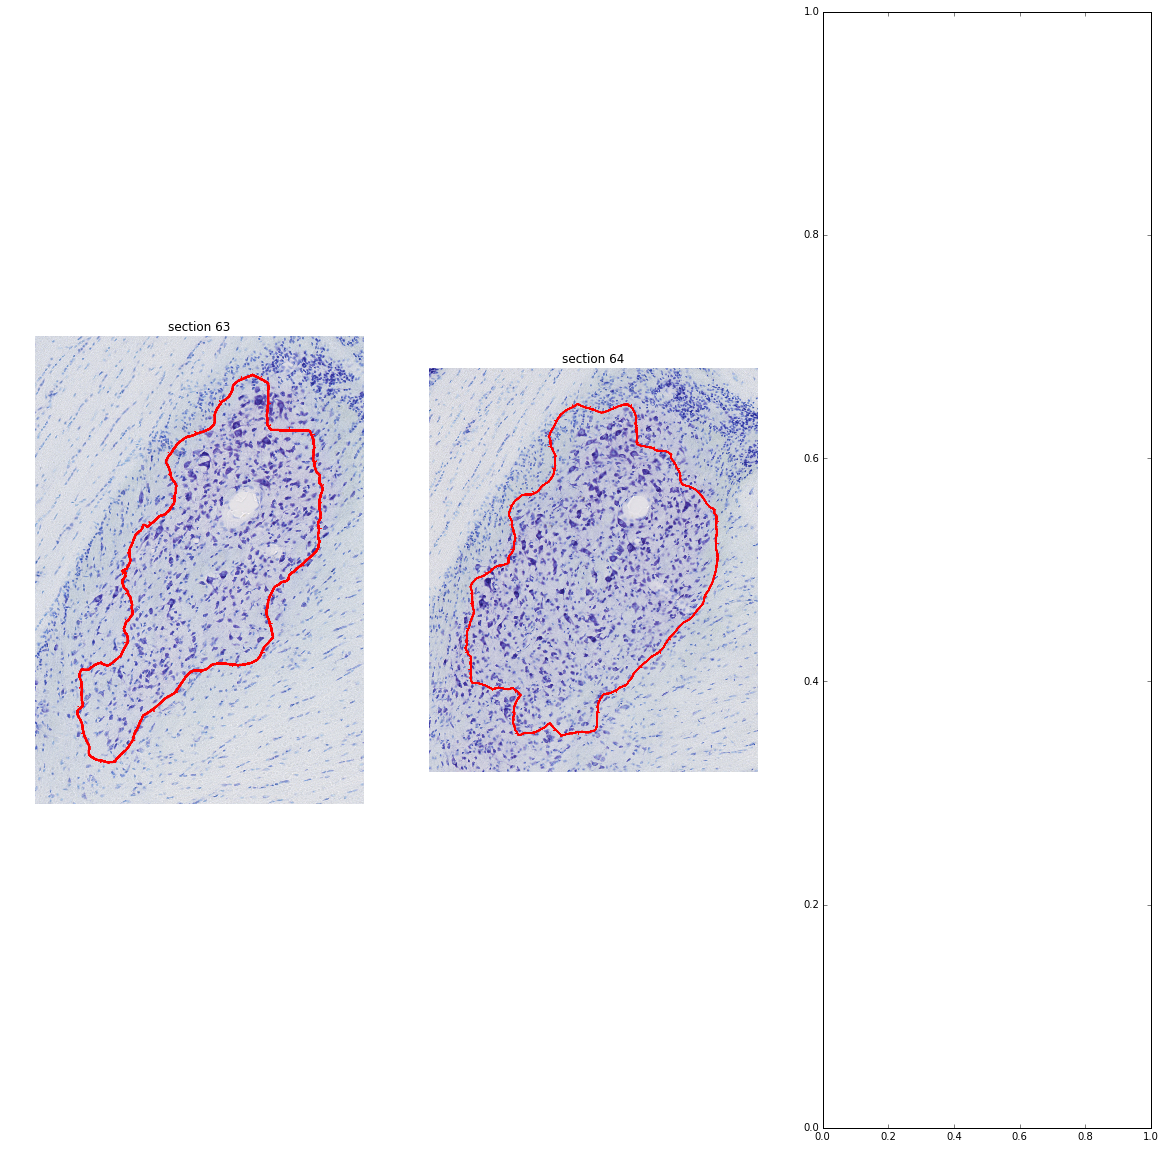

In [23]:
ncol = 3

n_cls = len(label_examples['PrVd'])
fig, axes = plt.subplots(int((n_cls-1)/ncol)+1, ncol, figsize=(20,20), squeeze=True)
axes = axes.flatten()
# axes = np.atleast_1d(axes)

for i, (sps, sec) in enumerate(all_sps_secs):
    
    dms[sec].load_multiple_results(['texHist', 'spCentroids'])
    
    center = dms[sec].sp_centroids[sps]
    
    ymin, xmin  = center.min(axis=0).astype(np.int) - 300
    ymax, xmax  = center.max(axis=0).astype(np.int) + 300
    
#     viz = dms[sec].visualize_cluster(sps, xmin=xmin, ymin=ymin, xmax=xmax, ymax=ymax)
    
    viz = dms[sec].visualize_edge_set(dms[sec].find_boundary_dedges_ordered(sps), 
                                      xmin=xmin, ymin=ymin, xmax=xmax, ymax=ymax, 
                                      bg='originalImage')

    axes[i].imshow(viz)
    axes[i].set_title('section %d' % sec)
    axes[i].axis('off')
    
plt.show()

In [ ]:
# atlas = img_as_ubyte(dms[139].image_rgb_jpg)
# for label, (v1,v2,s1,s2,c0) in label_position.iteritems():
#     angle = np.rad2deg(np.arctan2(v1[1], v1[0]))
#     cv2.ellipse(atlas, tuple(c0.astype(np.int)), (int(2*1.5*s1), int(2*1.5*s2)), int(angle), 0, 360, (0,255,0), 10)
# display(atlas)